<a href="https://colab.research.google.com/github/a1coderxt/a1coderxt/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Let's Explore PyTorch workflow

In [31]:
import torch
from torch import nn ##nn contains all the pytorch's building blocks for neural network
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

Create device-agnostic code.

This means if we've got the access to a GPU, our code will use it

if no gpu is available , the code will default to using CPU

In [32]:
# Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


## 1. Data (Preparing and loading)

Data can be almost anything ... in ML

* Excel spreadsheet
* Image of any kind
* Videos (Youttube has a lot of data)
* Audio like songs or podcasts
* DNA
* TEXT

Machine learning is a game of two parts:

 1. Get data into a numerical representation
 2. Build a model to learn pattern in that numerical representation

To showcase this let's create some *know* data using the **Linear Regression**
 formula

 we'll use a linear regression formula to make a straight line with *know* **parameters**

In [33]:
#Create *known* parameters

weight = 0.7
bias =0.3

#Create
start = 0
end = 1
step = 0.2

# Create X and y as feature and label (this is how we conver the data into tensor)
X = torch.arange(start , end , step).unsqueeze(dim=1)
y = weight * X + bias

X[:10] , y[:10]

(tensor([[0.0000],
         [0.2000],
         [0.4000],
         [0.6000],
         [0.8000]]),
 tensor([[0.3000],
         [0.4400],
         [0.5800],
         [0.7200],
         [0.8600]]))

In [34]:
len(X) , len(y)

(5, 5)

### Splitting data into training and test set most important concept of ml

In [35]:
# Create a train/test split  this is not the ideal way
train__split = int(0.8 * len(X))
X_train  , y_train = X[:train__split] , y[:train__split]
X_test , y_test = X[train__split:] , y[train__split:]

len(X_train) ,len(y_train) , len(X_test) , len(y_test)


(4, 4, 1, 1)

How might we better visualize out data?

In [36]:

def plot_predictions(train_data= X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data , train_labels , c="b" , s=4 , label ="Training data")

  plt.scatter(test_data , test_labels , c="g" , s=4 , label = "Testing data")

  if predictions is not None:
    plt.scatter(test_data , predictions, c="r", s=4 , label="predictions")

  plt.legend(prop={"size" : 14});

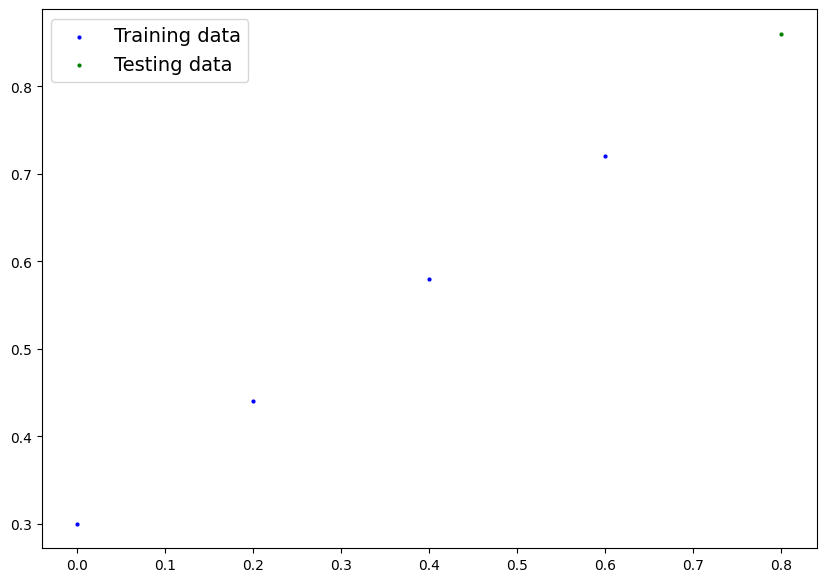

In [37]:
plot_predictions()

## Building MOdel

Our frist PyTorch Model!


What our model does:
* Start with random values (weights & bias)
* Look at the training data and adjust the random values to better represent (or get closer too) the ideal values (the weight & bias value we used to create the data)

How does it do so ?

Through two main alogrithms:
1. Gradient desent
2. Backpropogation

In [38]:
 # create a Linear Regression model class
from torch import nn

class LinearRegressionModel(nn.Module):   # Almost every thing in pytorch inherite from nn module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    # Forward method to define the computation in the model
  def forward(self, x: torch.tensor) -> torch.tensor:  # <- "x" is the input data
      return self.weights * x  + self.bias  # this is the linear regression formula



### PyTorch model building essentials

* Torch.n - contains all of the bulding block for compuational graphs (a neural network can be consider as computational graph )
* torch.nn .Parameter - what parameter should our model try and learn, ofter a pytorch layer from a torch.nn will set these for us
* torch.nnModule - The base class for all neural network modules, if you subclass it , you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they wil help with the gredient descent
* def forward() - All nn.Module subclasses required you to ovrewrite Forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we've created a model , let's see what's inside..

So we can check our model parameters or what inside our model using .parameters()


In [39]:
# Creating a random seed
torch.manual_seed(42)

# Create an instance of the model(subclass of nn.Model)

model_0 = LinearRegressionModel()


#check out the parameteres
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [40]:
# List name parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `tensor.inference_mode()`

To check our model's predictive power, let's see how well it predicts y_test based on X_test

when we pass data through our model, it's going to run it through the forward() method.

In [41]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

# with torch.no_grad():  we can use this method too but torch.inference_mode() preffered!
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982]])

In [42]:
y_test

tensor([[0.8600]])

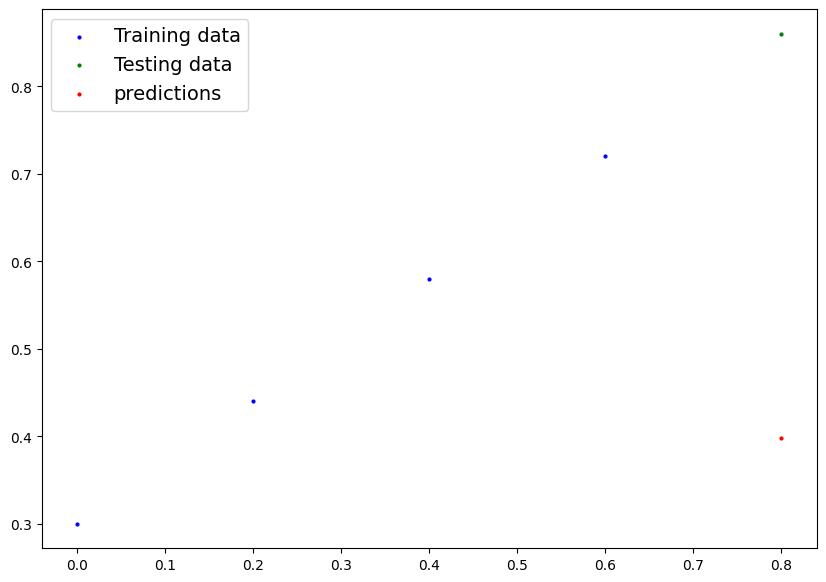

In [43]:
plot_predictions(predictions=y_preds)

## Training Model

The whole idea for the training to move from some *unknow* parameter to *known* parameter

One way to measure the loss or error is to use A Loss Functions :

* Note : Loss function may also be called cost function or criterion in diffrent areas. For  our case , we're going to refer to it as a loss function


This we need to train :

* **Loss function :**  A function to measure how wrong your model's predictions are compare to the ideal outputs , lower is better

* **Optimizer :** Take into account the loss of a model and adjusts the model's parameters (e.g. weights & bias in improve the loss function ad specifically for PyTorch we need a training loop and a testing loop)

In [44]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [45]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [46]:
# Setup  loss function

loss_fn = nn.L1Loss()


# Setup optimzer function  torch.optim.SGD (stochastic gredient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01)  # lr = learning rate = possibly the most important hyperparameters you can set


### Building a training and testing loop in pytorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward() functions` ) to make predictions on data - also called forward propagation
2. calculate the loss ( compare forward pass predictions to ground truth abels)
3. Optimizer zero grad
4. Loss backward - move backward through the network to calculate the gredients of each of the parameters of our model with respect to the loss (**Backpropogation**)
5. Optimizer step - use the optimizer to adjust our model's parameteres to try and improve the loss (**Gredient descent**)

In [47]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    #0. Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.28018349409103394 | MAE Test Loss: 0.44943830370903015 
Epoch: 10 | MAE Train Loss: 0.1711834818124771 | MAE Test Loss: 0.32543832063674927 
Epoch: 20 | MAE Train Loss: 0.0815882459282875 | MAE Test Loss: 0.2164384126663208 
Epoch: 30 | MAE Train Loss: 0.05506197363138199 | MAE Test Loss: 0.15983855724334717 
Epoch: 40 | MAE Train Loss: 0.05106198042631149 | MAE Test Loss: 0.1438385248184204 
Epoch: 50 | MAE Train Loss: 0.04706195741891861 | MAE Test Loss: 0.12783849239349365 
Epoch: 60 | MAE Train Loss: 0.043061964213848114 | MAE Test Loss: 0.1118384599685669 
Epoch: 70 | MAE Train Loss: 0.03906197100877762 | MAE Test Loss: 0.09583842754364014 
Epoch: 80 | MAE Train Loss: 0.035062022507190704 | MAE Test Loss: 0.07983863353729248 
Epoch: 90 | MAE Train Loss: 0.03106207400560379 | MAE Test Loss: 0.06383883953094482 
Epoch: 100 | MAE Train Loss: 0.02746211737394333 | MAE Test Loss: 0.05443906784057617 
Epoch: 110 | MAE Train Loss: 0.024262160062789917 | MAE T

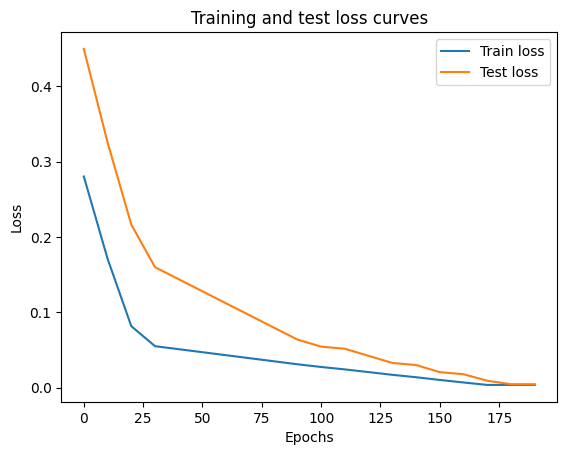

In [48]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [49]:
weight , bias

(0.7, 0.3)

In [50]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [51]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6917])), ('bias', tensor([0.2988]))])

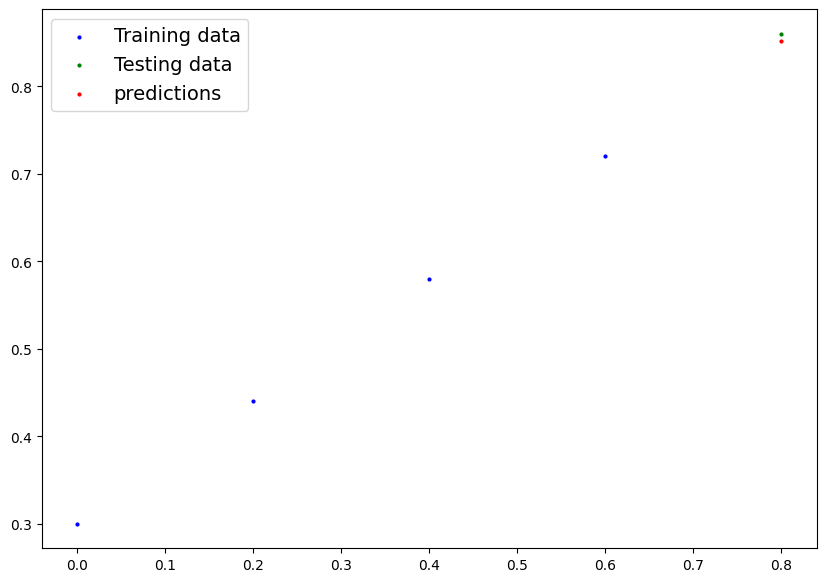

In [52]:
plot_predictions(predictions=y_preds_new)

# we can see we are reducing the loss

## Saving a model in PyTorch

There are the main method for saving and loading model in PyTorch.

1. `torch.save()` - allows you save a pytorch object in python's pickel formate
2. `torch.load()` - allows you to load a saved PyTorch object or model
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [53]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6917])), ('bias', tensor([0.2988]))])

In [54]:

# Save the model
from pathlib import Path

# 1. create a mdoel directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a nodel save path

MODEL_NAME = "O1_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# Save the model with state_dict()
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)



In [55]:
!ls -1 models

O1_pytorch_workflow_model_0.pth


In [56]:
# Load the model

loaded_model_0 = LinearRegressionModel()

# load the save state_dict(() of model_0)

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))



<All keys matched successfully>

In [57]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6917])), ('bias', tensor([0.2988]))])

In [58]:
# Make some prediction with our loaded model

loaded_model_0.eval()

with torch.inference_mode():
  loaded_mode_preds = loaded_model_0(X_test)

loaded_mode_preds

tensor([[0.8522]])

In [59]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [60]:
# Compare loaded model pred with original model preds
y_preds == loaded_mode_preds

tensor([[True]])